# Visualises results from running cluster-based CCI with different methods.

INPUT:
 * /Volumes/GML001-Q1851/Brad/breast_ClusterCCIResults.h5ad

OUTPUT:
 * plots/X2_method_comp_clusters/*_chordplot.pdf
 
## Environment setup

In [2]:
# TODO: NOTE must be run in folder with README entitled StLearn Reproduce
work_dir = '/Users/uqbbalde/Desktop/Uni_Studies/projects/stlearn_manuscript/mainfigCCI_newCCISupps/'

import os
os.chdir(work_dir)

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import scanpy as sc
import scripts.utils.visualisation.helpers as vhs
import scripts.X2_method_comp_clusters.helpers as chs

data_dir = '/Volumes/GML001-Q1851/Brad/'
data_dir2 = 'data/breast/cluster/'
out_plots = 'plots/X2_method_comp_clusters/'

out = '.pdf'

## Loading the data

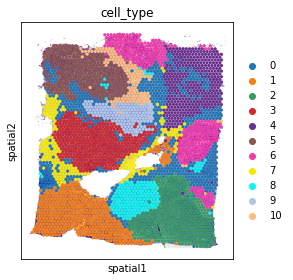

In [3]:
data = sc.read_h5ad(data_dir+'breast_ClusterCCIResults.h5ad')

#### Making the spatial plot #####
sc.pl.spatial(data, color='cell_type', size=1.5, show=False)
vhs.dealWithPlot(True, True, True, out_plots,
                 'breast_clusters_spatial.pdf', 300)

#### Getting results from other methods #####
st_df = data.uns['lr_cci_cell_type']
cc_df = pd.read_csv(data_dir2+'cell_chat_ints.txt', sep='\t')
scsr_df = pd.read_csv(data_dir2+'singlecellsignalr_ints.txt', sep='\t')
natmi_df = pd.read_csv(data_dir2+'natmi_ints.txt', sep='\t', index_col=0)
squidpy_df = pd.read_csv(data_dir2+'squidpy_ints.txt', sep='\t', index_col=0)
cpdb_df = pd.read_csv(data_dir2+'cellphonedb_ints.txt', sep='\t', index_col=0)

methods = ['stLearn', 'CellChat', 'SingleCellSignalR', 'NATMI', 'squidpy',
           'CellPhoneDB']
int_dfs = [st_df, cc_df, scsr_df, natmi_df, squidpy_df, cpdb_df]
for int_df in int_dfs:
    min_ = min(int_df.index.values.astype(int))
    if min_ > 0:
        int_df.index = (int_df.index.values.astype(int)-1).astype(str)
        int_df.columns = (int_df.columns.values.astype(int)-1).astype(str)
    else:
        int_df.index = int_df.index.values.astype(str)
        int_df.columns = int_df.columns.values.astype(str)

## Visualising the chordplots of the results

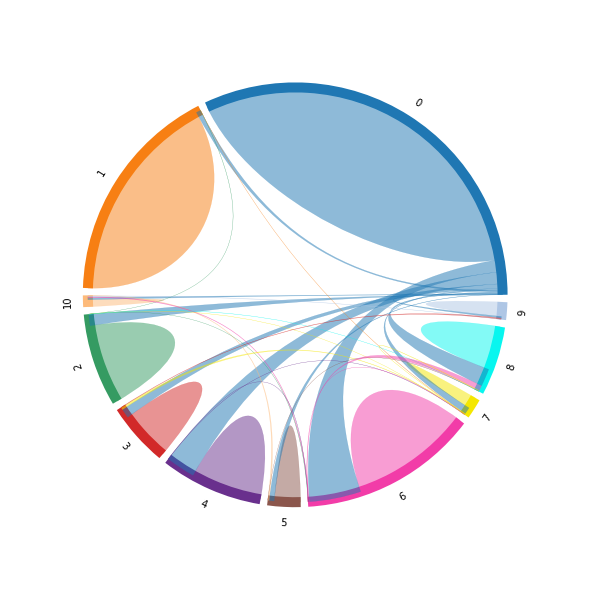

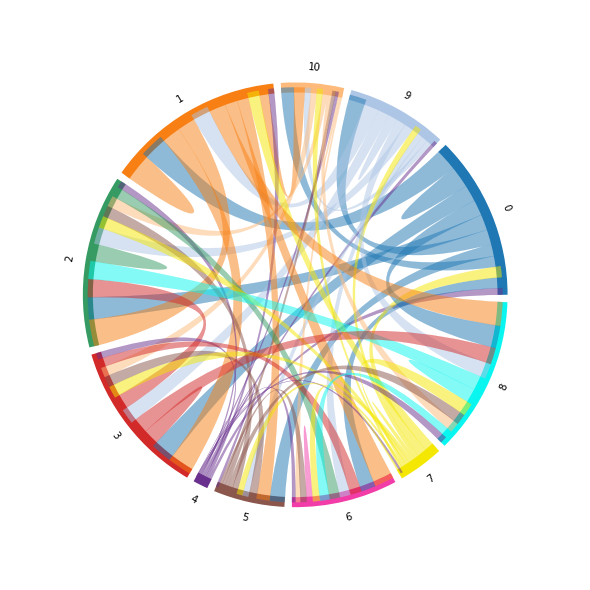

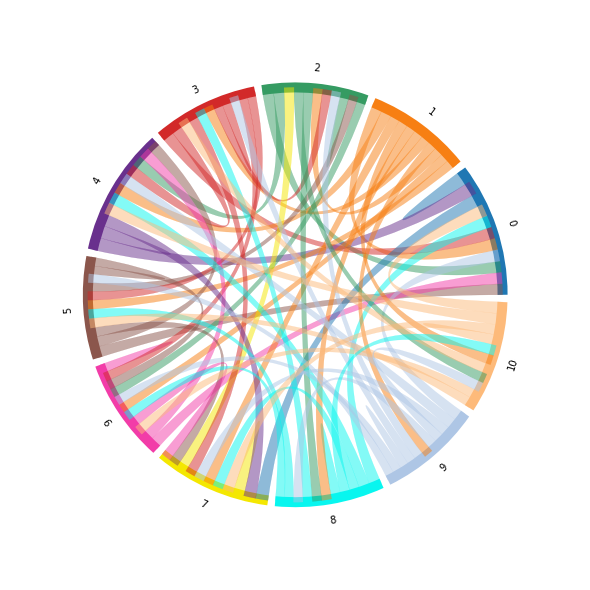

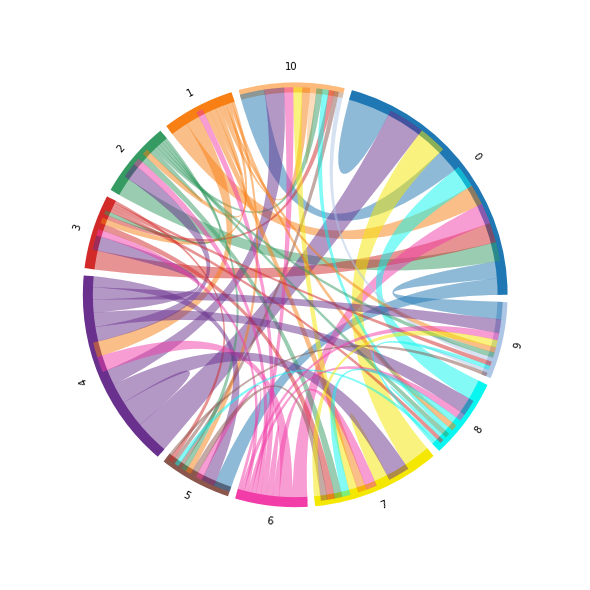

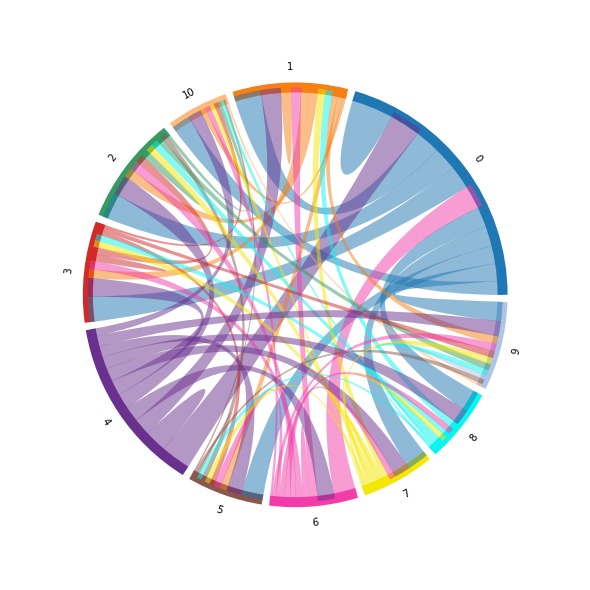

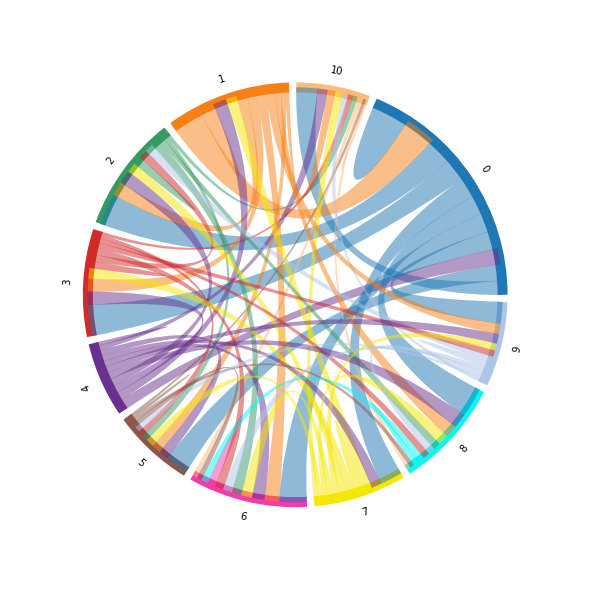

In [5]:
for i, int_df in enumerate(int_dfs):
    chs.chord_plot(int_df, data, 'cell_type', min_ints=3,
                   n_top_ccis=11, show=False)
    vhs.dealWithPlot(True, True, True, out_plots,
                     f'{methods[i]}_chordplot.pdf', 300)

## Chordplots subsetted to distal clusters

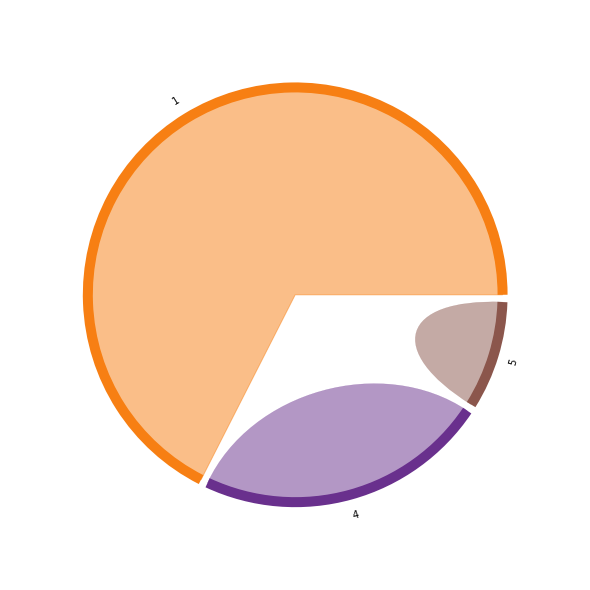

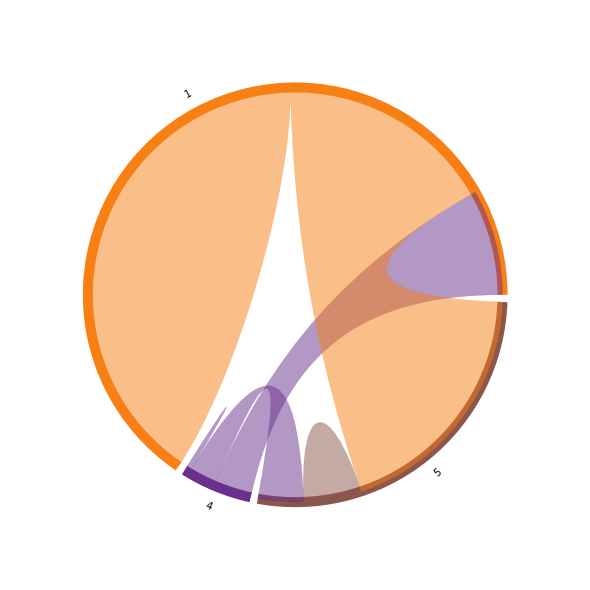

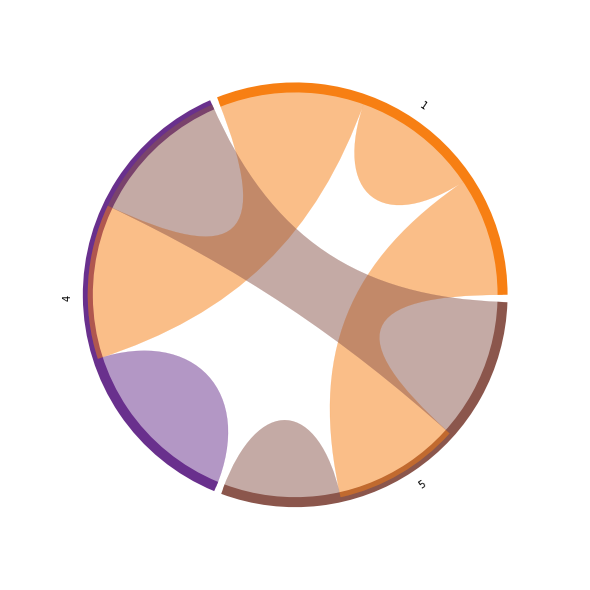

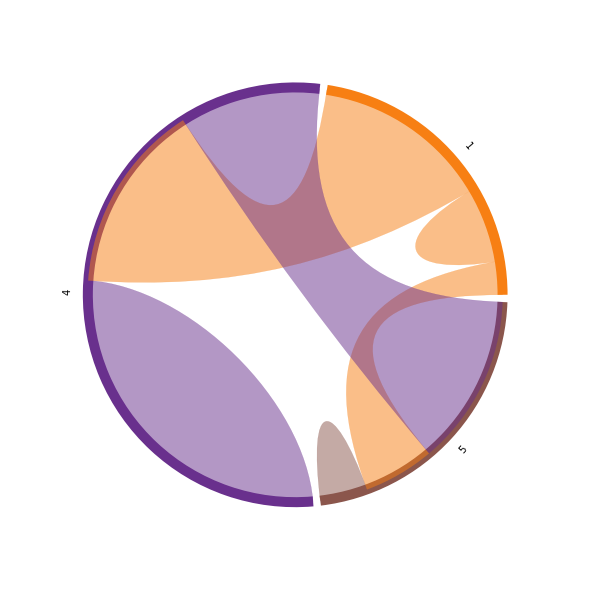

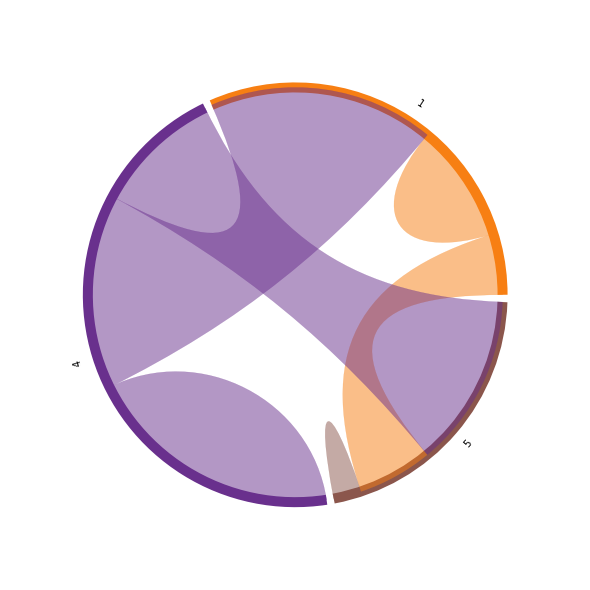

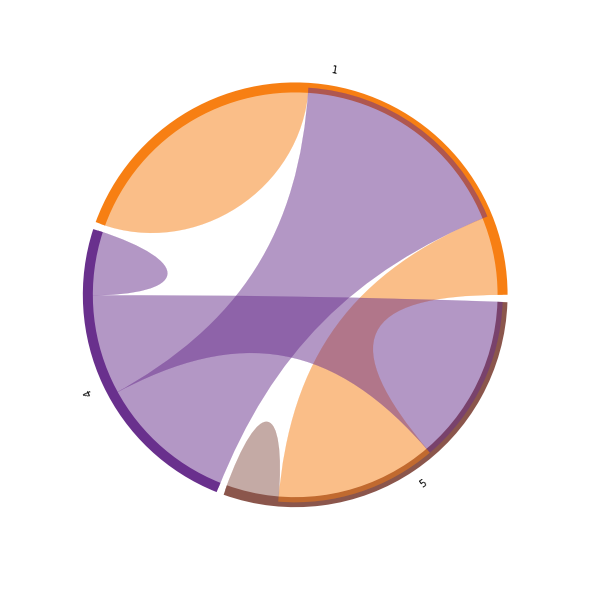

In [6]:
distals = ['1', '4', '5']
sub_dfs = [int_df.loc[distals, distals]for int_df in int_dfs]

for i, sub_df in enumerate(sub_dfs):
    chs.chord_plot(sub_df, data, 'cell_type', min_ints=3,
                   n_top_ccis=11, show=False)
    vhs.dealWithPlot(True, True, True, out_plots,
                     f'{methods[i]}_distal_chordplot.pdf', 300)